<a href="https://colab.research.google.com/github/Hsuyeon01/ESAA/blob/main/0523_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH5 회귀

## 01. 회귀 소개


> 회귀

- 회귀 :  여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭
- Y = W1X1 + W2X2 + W3X3 + ... + WnXn
   - Y : 종속변수
   - X1, X2, X3,..,Xn : 독립변수
   - W1, W2, W3,...,Wn : 회귀 계수
- 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것


> 회귀 유형 구분

- 독립변수 개수
   - 1개 : 단일 회귀
   - 여러 개 : 다중 회귀
- 회귀 계수의 결합
   - 선형 : 선형 회귀
   - 비선형 : 비선형 회귀


> 선형 회귀
- 일반 선형 회귀 : 실제값과 예측값 차이를 최소화하는 직선형 회귀선을 최적화하는 방식, 규제를 적용하지 않은 모델
- 릿지 : 선형 회귀에 L2 규제를 추가한 모델, L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델
- 라쏘 : 선형 회귀에 L1 규제를 적용한 방식, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것
- 엘라스틱넷 : L2, L1 규제를 함께 결합한 모델, 주로 피처가 많은 데이터 세트에서 적용
- 로지스틱 회귀 : 분류에 사용되는 선형모델, 매우 강력한 분류 알고리즘으로 일반적으로 이진 분류 뿐만 아니라 희소 영역의 분류, 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임








## 02. 단순 선형 회귀를 통한 회귀 이해

단순 선형 회귀 : 독립변수도 하나, 종속변수도 하나인 선형 회귀

- Y = W0 + W1X
- 실제값 : W0 + W1X + 오류 값
- 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류 값
- 최적의 회귀 모델 : 전체 데이터의 잔차합이 최소가 되는 모델, 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수 찾음
- RSS : 오류 값의 제곱을 구해서 더하는 방식, error 제곱

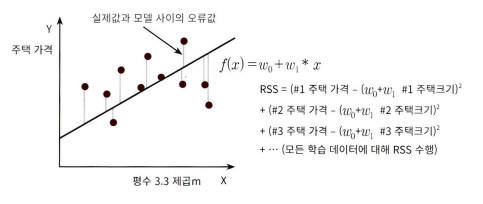

- RSS는 회귀식의 독립변수 X, 종속변수 Y가 중심 변수가 아니라 w 변수가 중심변수임을 인지하는 것이 매우 중요
- RSS는 비용함수, 손실함수


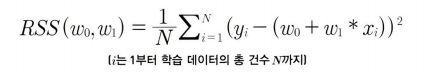

## 03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개


> 경사 하강법

- 점진적으로 반복 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식
- 직관적이고 빠르게 비용함수가 최소가 되는 W 파라미터를 구할 수 있음
- 비용함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속적으로 보정해 나감
- 오류 값이 더 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때 W 값을 최적 파라미터로 반환
- 비용함수가 2차 함수라면 경사 하강법은 최초 w에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트하고 마침내 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용함수가 최소인 지점으로 간주하고 그때의 w을 반환



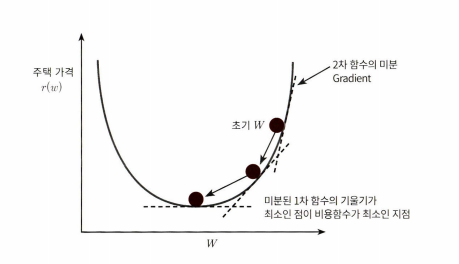



> 경사 하강법 수식 정리

- R(w) = RSS(w0, w1)
- 두 개의 w 파라미터를 가지기 때문에 각 변수에 편 미분을 적용

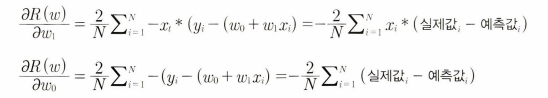

- 편미분 결괏값을 반복적으로 보정하면서 w0, w1을 업데이트하면서 비용함수 R(w)가 최소가 되는 w0, w1을 구할 수 있음
- 업데이트는 새로운 w1을 이전 w1에서 편미분 결괏값을 마이너스하면서 적용
- 편미분 값이 너무 클 수 있기 때문에 보정계수를 곱하는 데 이를 '학습률'이라고 함

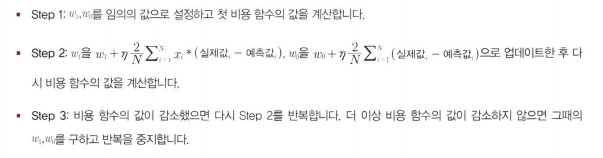



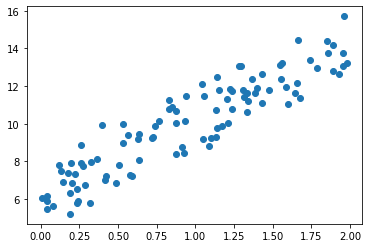

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사 (w1=4, w0=6), 임의의 값이 노이즈를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

In [ ]:
# w1과 w0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)
  # 먼저 w1_update, w0_update를 각자 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X,w1.T) + w0
  diff = y- y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))
  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X,y,iters=10000):
  # w0와 w1를 모두 0으로 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters) : 
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1-w1_update
    w0 = w0-w0_update

  return w1, w0

In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X,y,iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*X + w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost : 0.9935


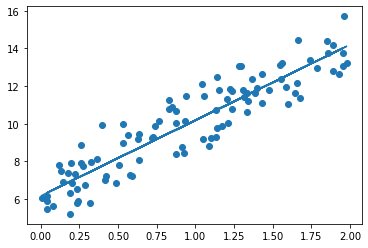

In [ ]:
plt.scatter(X,y)
plt.plot(X,y_pred)

- 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있음 -> 실전에서는 대부분 확률적 경사하강법 사용
  - 확률적 경사 하강법 : 전체 입력 데이터로 w가 업데이트 되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트 되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도 보장

In [ ]:
def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))
  prev_cost = 100000
  iter_index=0

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0]) 
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1-w1_update
    w0 = w0-w0_update

  return w1, w0


In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X,y, iters=1000)
print("w1 : ", round(w1[0,0],3), "w0 : ", round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost :  {0:.4f}'.format(get_cost(y,y_pred)))

w1 :  4.028 w0 :  6.156
Stochastic Gradient Descent Total Cost :  0.9937




> 피처가 여러 개인 경우

- 피처가 M개 있다면 그에 따른 회귀 계수도 M+1개로 도출
- Y = w0 + w1X1 + w2X2 + ... + W100X100
- 데이터의 개수가 N이고 피처 M개의 입력 행렬을 Xmat이라고 하면 예측행렬

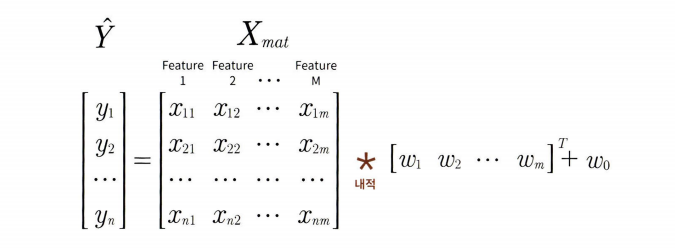

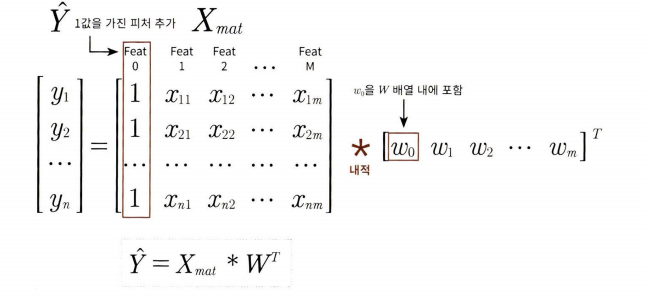

## 05. 다양 회귀와 과적합/과소적합의 이해

### 다항 회귀 이해 

다항 회귀 : 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것

- 다항 회귀는 선형 회귀




In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처 : \n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처 : \n', poly_ftr)

일차 단항식 계수 피처 : 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [2]:
def polynomial_func(X):
  y = 1+2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature : \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값 : \n', y)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]


In [5]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature :\n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape : ', model.coef_.shape)

3차 다항식 계수 feature :
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape :  (10,)


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

# pipeline 객체로 Streamline하게 Polynomail Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)), 
                    ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 핵심 계수 \n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 핵심 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이요한 과소적합 및 과적합 이해

- 다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있음, 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링 가능, 글나 과적합의 문제가 발생

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples=30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1


 Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

 Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.043208749872320706 입니다.

 Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE는 180526263.3177066 입니다.


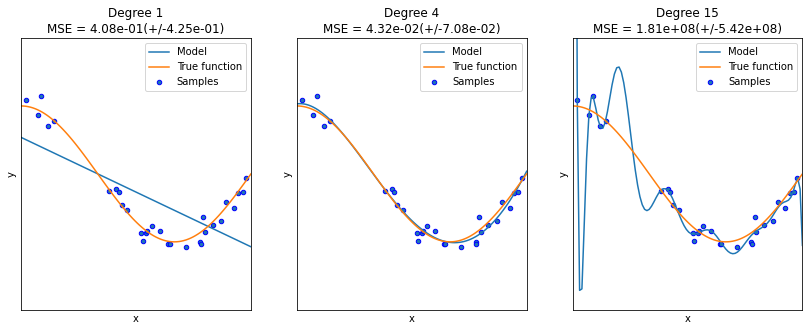

In [16]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree 별로 Polynomial 변환
  polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([('polynomial_features', polynomial_features),
                       ('linear_regression', linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  # 교차 검증으로 다항 회귀를 평가함
  scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
  # pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\n Degree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients,2)))
  print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1 * np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
  X_test = np.linspace(0,1,100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
  # 실제값 곡선
  plt.plot(X_test, true_fun(X_test),'-', label='True function')
  plt.scatter(X,y, edgecolor='b', s=20, label='Samples')

  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim((0,1)); plt.ylim((-2,2))
  plt.legend(loc='best')
  plt.title('Degree {}\nMSE = {:.2e}(+/-{:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- 맨 왼쪽의 Degree1 예측 곡선은 단순한 직선으로서 단순 선형 회귀와 똑같음, 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순해보임, 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소적합 모델이 됨. MSE 값은 약 0.407
- 가운데 Degree4 예측 곡선은 실제 데이터 세트와 유사한 모습, 변동하는 잡음까지 예측하지는 못했지만 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이 되었음, MSE 값은 약 0.043으로 가장 뛰어난 예측 성능을 보임
- 맨 오른쪽 Degree15 예측 곡선은 MSE 값이 182815432가 될 정도로 오류값 발생, 예측 곡선을 보면 데이터 세트의 잡음 값까지 지나치게 반영하게 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어짐